<a href="https://colab.research.google.com/github/maxwillzq/algoTrading/blob/main/notebooks/chapter_4_individual_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 定义基本常数包括股票代码，时间

In [2]:
# if use it in colab, please install it by yourself first
!pip install git+https://github.com/maxwillzq/algoTrading.git

  Cloning https://github.com/maxwillzq/algoTrading.git to /tmp/pip-req-build-t8freg_z
  Running command git clone -q https://github.com/maxwillzq/algoTrading.git /tmp/pip-req-build-t8freg_z
     |████████████████████████████████| 109 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 436 kB/s 
     |████████████████████████████████| 70 kB 7.6 MB/s 
     |████████████████████████████████| 115 kB 38.6 MB/s 
     |████████████████████████████████| 251 kB 51.1 MB/s 
     |████████████████████████████████| 81 kB 8.6 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 127 kB 53.3 MB/s 
     |████████████████████████████████| 111 kB 55.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 50.4 MB/s 
  Created wheel for algotrading: filename=algotrading-0.0.4-py3-none-any.whl size=62310 sha256=465dea18bef6bc994d08d41fc92f108212b73962c2e4c39b3c0367452f00ef9d
  Stored in directory: 

In [3]:
import algotrading
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.news as sn
import yahoo_fin.stock_info as si
import numpy as np
import datetime as dt

In [4]:
# collect data first
stock_name = "AMZN"
days = 2 * 365
unit = 1000000000 # Billion USD
st = algotrading.stock.Stock(stock_name)
st.read_data(days)
st.generate_more_data()
status, messages, result_dict = st.is_good_business()
print(f"{st.name} is a good business? \nAnswer: {status}")
if status == False:
    print("Reason:", messages)
    #print("result_dict", result_dict)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


AMZN is a good business? 
Answer: False
Reason: ['fail: weak profit margin. profit margin = 7.1', 'fail: free cash flow is negative, Levered free cash flow (ttm) = -0.78725Billion USD', 'fail: revenue growth yoy less than 10%.rate = 9.4']


# 2. 分析基本财务数据

In [9]:
st = algotrading.stock.Stock(stock_name)

In [10]:
finance_data = si.get_financials(stock_name)

In [11]:
finance_data.keys()

dict_keys(['yearly_income_statement', 'yearly_balance_sheet', 'yearly_cash_flow', 'quarterly_income_statement', 'quarterly_balance_sheet', 'quarterly_cash_flow'])

In [12]:
column_list = ['netIncome','grossProfit', 'ebit', 'totalRevenue']
yearly_income_statement = finance_data['yearly_income_statement'].T.sort_index()
print("Notes: the unit is Billion USD")
yearly_income_statement[column_list]/unit

Notes: the unit is Billion USD


Breakdown,netIncome,grossProfit,ebit,totalRevenue
endDate,,,,
2018-12-31,10.073,93.731,12.421,232.887
2019-12-31,11.588,114.986,14.541,280.522
2020-12-31,21.331,152.757,22.899,386.064
2021-12-31,33.364,197.478,24.879,469.822


In [13]:
try:
    column_list = ['totalCashFromOperatingActivities','capitalExpenditures']
    yearly_cash_flow = finance_data['yearly_cash_flow'].T.sort_index()
    yearly_cash_flow[column_list]/unit
except:
    pass

In [14]:
column_list = ['netIncome','grossProfit', 'ebit', 'totalRevenue']
quarterly_income_statement = finance_data['quarterly_income_statement'].T.sort_index()
quarterly_income_statement[column_list]/unit

Breakdown,netIncome,grossProfit,ebit,totalRevenue
endDate,,,,
2021-03-31,8.107,46.115,8.865,108.518
2021-06-30,7.778,48.904,7.702,113.08
2021-09-30,3.156,47.882,4.852,110.812
2021-12-31,14.323,54.577,3.46,137.412


In [15]:
earnings = si.get_earnings(stock_name)
earnings["yearly_revenue_earnings"].set_index('date')
earnings["yearly_revenue_earnings"]/unit

,date,revenue,earnings
0,0.000002,232.887,10.073
1,0.000002,280.522,11.588
2,0.000002,386.064,21.331
3,0.000002,469.822,33.364


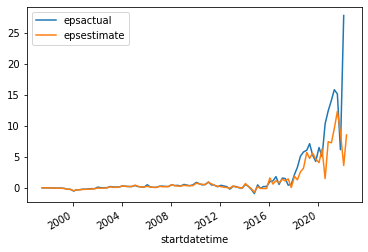

In [16]:
earnings_history = si.get_earnings_history(stock_name)
earnings_history = pd.DataFrame(earnings_history)
earnings_history = earnings_history.set_index("startdatetime")
earnings_history = earnings_history.sort_index()
earnings_history.index = pd.to_datetime(earnings_history.index)
ax = earnings_history[["epsactual", "epsestimate"]].plot()
#earnings_history[["epssurprisepct"]].plot(secondary_y=True, ax=ax, marker='o')
#ax.set_ylabel('size')
plt.show()

In [17]:
valuation = si.get_stats_valuation(stock_name)
valuation

,Unnamed: 0,As of Date: 2/15/2022Current,12/31/2021,9/30/2021,6/30/2021,3/31/2021,12/31/2020
0,Market Cap (intraday),1.58T,1.70T,1.67T,1.74T,1.56T,1.64T
1,Enterprise Value,1.60T,1.73T,1.68T,1.75T,1.56T,1.65T
2,Trailing P/E,47.88,65.21,57.20,65.39,73.97,95.23
3,Forward P/E,52.36,52.08,45.45,57.47,60.24,61.35
4,PEG Ratio (5 yr expected),2.72,1.99,1.42,1.39,1.47,1.26
5,Price/Sales (ttm),3.40,3.74,3.80,4.20,4.09,4.76
6,Price/Book (mrq),11.42,14.08,14.51,16.85,16.68,19.79
7,Enterprise Value/Revenue,3.40,12.61,15.18,15.50,14.37,13.15
8,Enterprise Value/EBITDA,21.54,68.68,122.29,102.44,85.80,104.54


# 3. 分析师未来前景预测

In [18]:
analysts_info = si.get_analysts_info(stock_name)
analysts_info.keys()

dict_keys(['Earnings Estimate', 'Revenue Estimate', 'Earnings History', 'EPS Trend', 'EPS Revisions', 'Growth Estimates'])

In [19]:
analysts_info['Earnings Estimate']

,Earnings Estimate,Current Qtr. (Mar 2022),Next Qtr. (Jun 2022),Current Year (2022),Next Year (2023)
0,No. of Analysts,38.00,37.00,44.00,43.00
1,Avg. Estimate,8.50,11.34,48.24,72.30
2,Low Estimate,6.06,3.64,25.78,27.39
3,High Estimate,11.60,17.21,59.99,96.06
4,Year Ago EPS,15.79,15.12,64.81,48.24


In [20]:
analysts_info['Growth Estimates']

,Growth Estimates,AMZN,Industry,Sector(s),S&P 500
0,Current Qtr.,-46.20%,NaN,NaN,NaN
1,Next Qtr.,-25.00%,NaN,NaN,NaN
2,Current Year,-25.60%,NaN,NaN,NaN
3,Next Year,49.90%,NaN,NaN,NaN
4,Next 5 Years (per annum),34.80%,NaN,NaN,NaN
5,Past 5 Years (per annum),100.60%,NaN,NaN,NaN


In [21]:
try:
    print("Next earning date ", si.get_next_earnings_date(stock_name))
except:
    pass

Next earning date  2022-04-27 20:00:00


# 4. 股票技术面分析

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(<Figure size 1200x900 with 10 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fc191dd40d0>])

<Figure size 864x648 with 0 Axes>

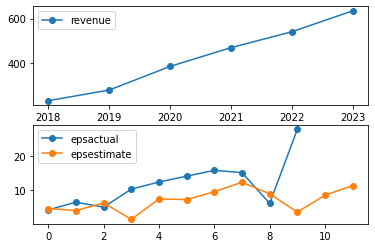

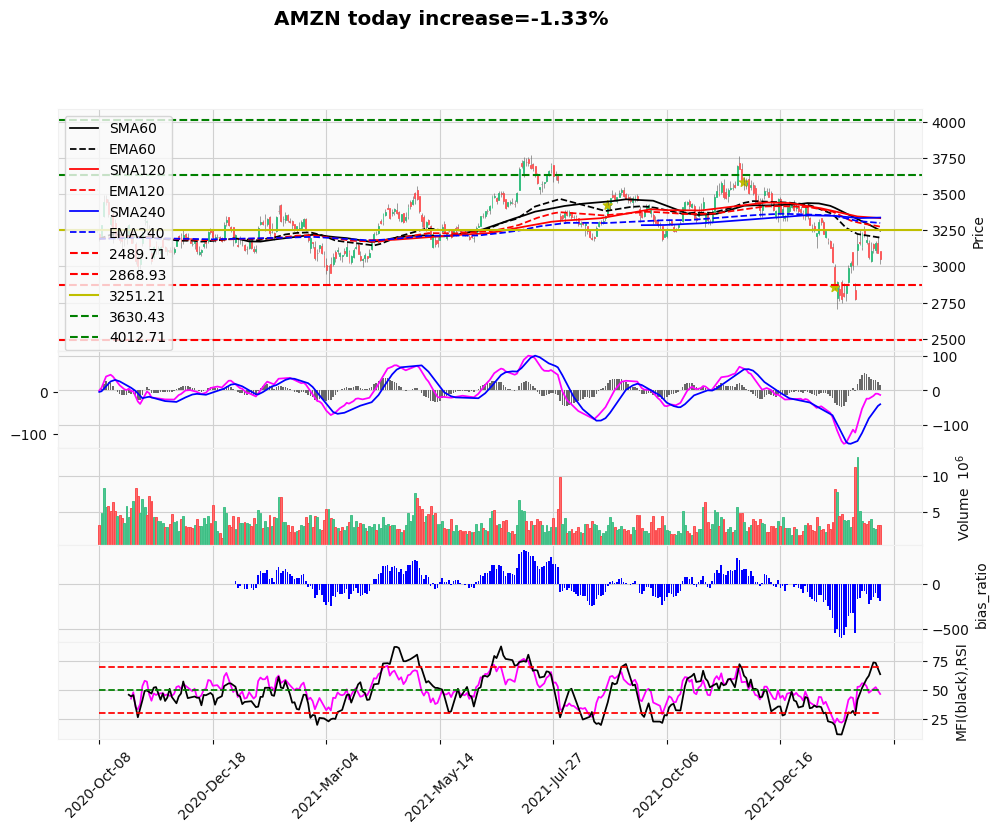

In [22]:
st.read_data(days=500)
st.generate_more_data()
st.plot(mav=[60, 120, 240], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=60)

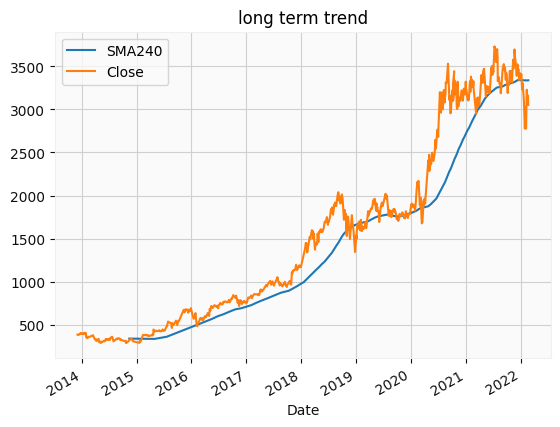

In [23]:
st.read_data(days=3000)
st.df[["SMA240",'Close']].plot(title="long term trend")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(<Figure size 1200x900 with 10 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fc18ce77b50>])

<Figure size 1200x900 with 0 Axes>

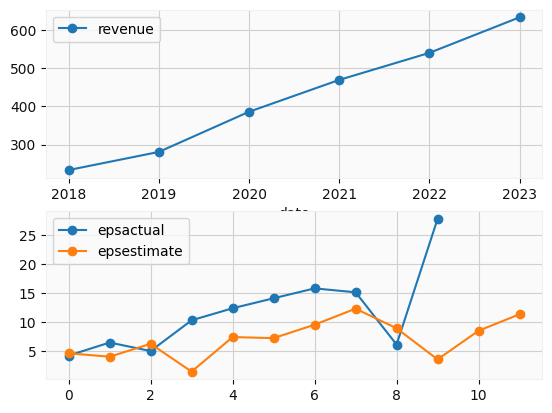

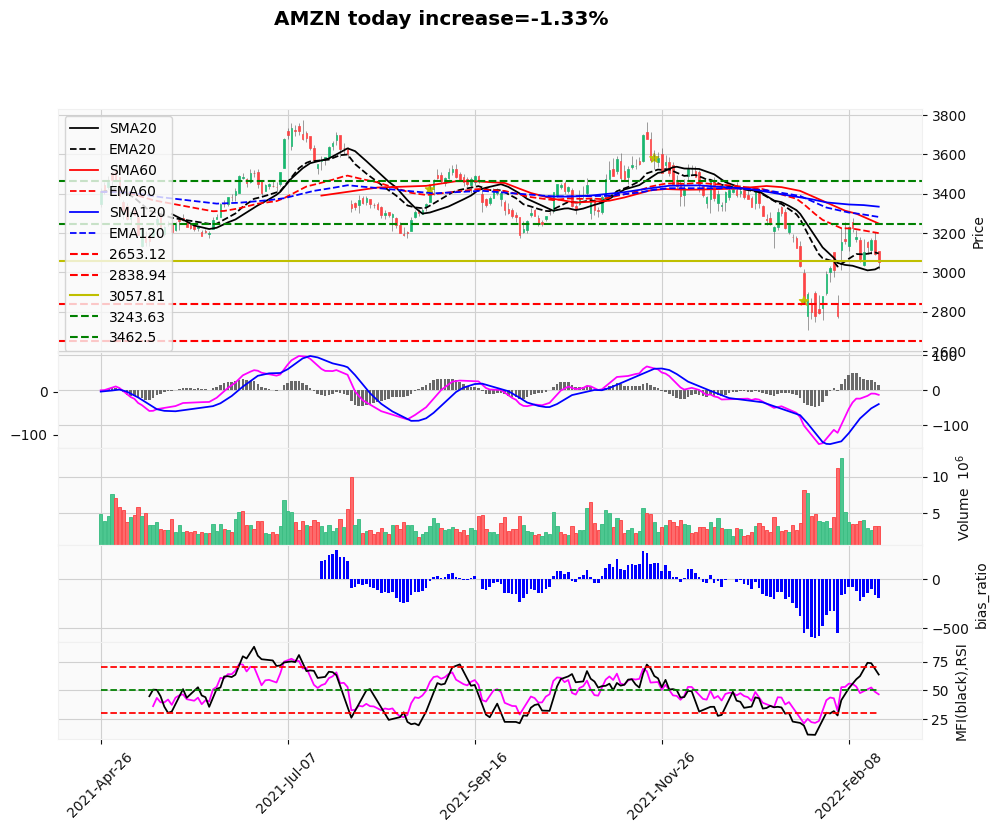

In [24]:
st.read_data(days=300)
st.generate_more_data()
st.plot(mav=[20, 60, 120], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(<Figure size 1200x900 with 10 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fc18c5dec50>])

<Figure size 1200x900 with 0 Axes>

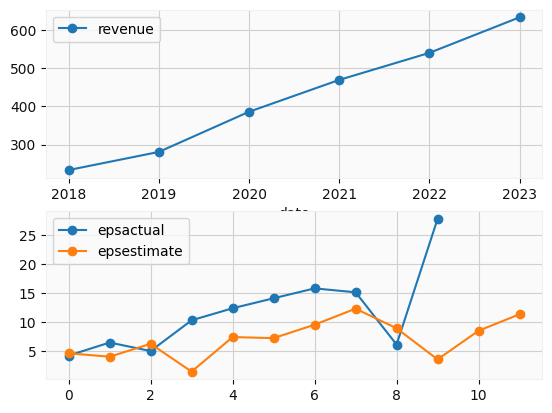

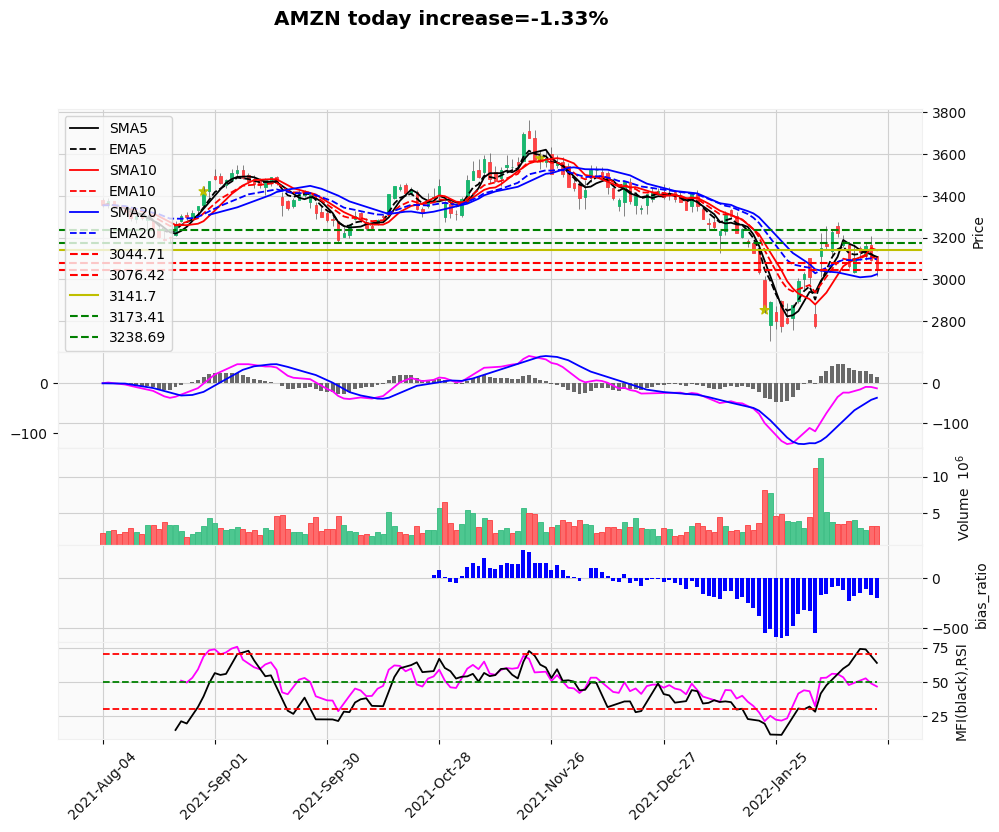

In [25]:
st.read_data(days=200)
st.generate_more_data()
st.plot(mav=[5, 10, 20], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=5)

In [28]:
st.df

,High,Low,Open,Close,Volume,normalized_volume,SMA5,SMA10,SMA20,SMA60,SMA120,SMA240,EMA5,EMA10,EMA20,EMA60,EMA120,EMA240,MACD_DIF,MACD_DEM,MACD_OSC,ATR,RSI,Momentum,Williams_%R,MFI,bias_ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-04,3388.879883,3345.560059,3379.350098,3354.719971,2183900,0.653338,NaN,NaN,NaN,NaN,NaN,NaN,3354.72,3354.72,3354.72,3354.72,3354.72,3354.72,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
2021-08-05,3389.000000,3340.919922,3356.219971,3375.989990,2433500,0.728009,NaN,NaN,NaN,NaN,NaN,NaN,3361.81,3358.59,3356.75,3355.42,3355.07,3354.90,1.696754,0.339351,1.357403,NaN,NaN,0.000000,0.000000,NaN,NaN
2021-08-06,3375.000000,3329.040039,3375.000000,3344.939941,2635300,0.788379,NaN,NaN,NaN,NaN,NaN,NaN,3356.19,3356.11,3355.62,3355.07,3354.90,3354.81,0.529856,0.377452,0.152404,NaN,NaN,0.000000,0.000000,NaN,NaN
2021-08-09,3354.879883,3328.520020,3343.610107,3341.870117,2148200,0.642658,NaN,NaN,NaN,NaN,NaN,NaN,3351.41,3353.52,3354.31,3354.64,3354.69,3354.71,-0.635305,0.174900,-0.810205,NaN,NaN,0.000000,0.000000,NaN,NaN
2021-08-10,3358.000000,3315.000000,3345.010010,3320.679932,2412600,0.721756,3347.64,NaN,NaN,NaN,NaN,NaN,3341.17,3347.55,3351.11,3353.53,3354.13,3354.42,-3.231325,-0.506345,-2.724980,NaN,NaN,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14,3168.969971,3033.000000,3035.020020,3103.340088,4022000,1.203226,3160.27,3092.59,3012.41,3282.94,3341.78,NaN,3118.68,3094.96,3091.61,3210.98,3284.85,3324.15,-20.624428,-54.147561,33.523133,146.270717,49.517571,303.620117,-32.687794,68.378668,-179.602433
2022-02-15,3160.139893,3092.750000,3152.110107,3130.209961,2848500,0.852161,3140.66,3103.22,3010.01,3273.51,3340.38,NaN,3122.52,3101.37,3095.28,3208.33,3282.29,3322.54,-15.775498,-46.473149,30.697651,139.846436,50.892942,352.760010,-28.272538,74.085521,-143.301725
2022-02-16,3176.679932,3094.689941,3115.810059,3162.010010,2635200,0.788350,3128.30,3118.20,3011.81,3264.94,3339.09,NaN,3135.68,3112.39,3101.64,3206.81,3280.31,3321.21,-9.259944,-39.030508,29.770563,138.029994,52.540899,369.260010,-22.134716,73.754810,-102.925675


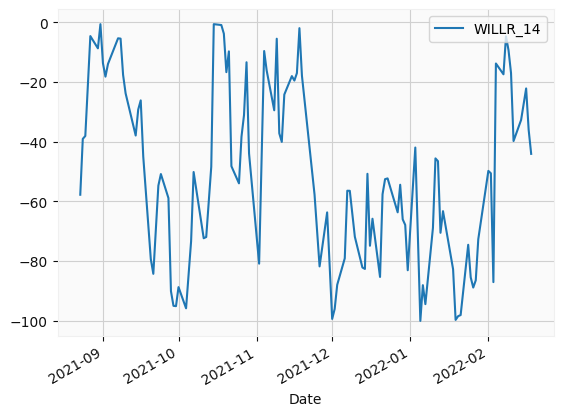

In [35]:
st.df.ta.willr().plot(legend="b")

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [39]:
st.read_data(days=600)
px.histogram(st.df, x='Volume', y='Close', nbins=50, orientation='h').show()